Import Packages

In [ ]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get factor dictionaries

In [2]:
factor_dict_dir_path = Path("Factor_Dictionary/Cr_Factor_Dictionary")
os.listdir(factor_dict_dir_path)

['mp-1007974_factor_dict.json',
 'mp-1008280_factor_dict.json',
 'mp-1009079_factor_dict.json',
 'mp-1009485_factor_dict.json',
 'mp-1009592_factor_dict.json',
 'mp-1010071_factor_dict.json',
 'mp-1014993_factor_dict.json',
 'mp-1014995_factor_dict.json',
 'mp-1016059_factor_dict.json',
 'mp-1016225_factor_dict.json',
 'mp-1016300_factor_dict.json',
 'mp-1016625_factor_dict.json',
 'mp-1016653_factor_dict.json',
 'mp-1016677_factor_dict.json',
 'mp-1017080_factor_dict.json',
 'mp-1017099_factor_dict.json',
 'mp-1017197_factor_dict.json',
 'mp-1017317_factor_dict.json',
 'mp-1018066_factor_dict.json',
 'mp-1018079_factor_dict.json',
 'mp-1018082_factor_dict.json',
 'mp-1018161_factor_dict.json',
 'mp-1021275_factor_dict.json',
 'mp-1021301_factor_dict.json',
 'mp-1021379_factor_dict.json',
 'mp-1021695_factor_dict.json',
 'mp-1022627_factor_dict.json',
 'mp-1022971_factor_dict.json',
 'mp-1023158_factor_dict.json',
 'mp-1023188_factor_dict.json',
 'mp-1023490_factor_dict.json',
 'mp-102

Explore Data


In [3]:
import json

# Load the JSON file
with open(factor_dict_dir_path / 'mp-374_factor_dict.json', 'r') as file:
    mp_374 = json.load(file)

# Print the keys
print(mp_374.keys())

# Iterate through the dictionary and print each key and value
for key, val in mp_374.items():
    print(key, val)


dict_keys(['Material', 'steinhart_vector', 'steinhart_parameter_sum', 'band_gap', 'oxidation_state', 'possible_species', 'density', 'quadrupole moment', 'quadrupole moment normalized'])
Material CrB2
steinhart_vector [[0.08756119780311145, 6.290172156022826e-18, 0.014072655757612181, 4.7243452351202986e-18, 0.037471913960586654, 1.4158371759548474e-17, 0.010324844238175866, 1.797705818978399e-17, 0.04802925123105493, 2.859162707995056e-17, 0.041066043831081304], 'CrB2']
steinhart_parameter_sum 0.23852590682162245
band_gap 0.0
oxidation_state 4.0
possible_species ['B2-', 'Cr4+']
density 5.316402027319826
quadrupole moment [[-35.02955039052665, 4.909388746643373e-06, -3.552713678800501e-15], [4.909388746643373e-06, -35.02954472165098, -5.329070518200751e-15], [-3.552713678800501e-15, -5.329070518200751e-15, -55.15345056384599]]
quadrupole moment normalized [[-0.25738979982611726, 1.5889458308132598e-08, 2.7755575615628914e-17], [1.5889458308132598e-08, -0.25738978147854513, 4.51028103753

Material Dictionary Formatting

In [4]:
data_list = []

for file_path in factor_dict_dir_path.glob('*.json'):
    with open(file_path, 'rb') as file:
        material_dict = json.load(file)

        # Extract individual values, keeping only numerical stuff
        material = material_dict['Material']
        steinhart_vector = material_dict['steinhart_vector'][0]  # Just the vector, ignoring the material name
        steinhart_param_sum = material_dict['steinhart_parameter_sum']
        band_gap = material_dict['band_gap']
        oxidation_state = material_dict['oxidation_state']
        possible_species = len(material_dict['possible_species'])
        density = material_dict['density']
        quadrupole_moment = np.array(material_dict['quadrupole moment']).flatten()  # Flatten matrix to vector
        quadrupole_moment_norm = np.array(material_dict['quadrupole moment normalized']).flatten()
        # Combine all the features into a single row (list)
        data_row = [
            material,
            *steinhart_vector,  # Unpack vector values
            steinhart_param_sum,
            band_gap,
            oxidation_state,
            possible_species,
            density,
            *quadrupole_moment,  # Unpack matrix values
            *quadrupole_moment_norm  # Unpack normalized matrix values
        ]
        
        data_list.append(data_row)

print(quadrupole_moment)

# Define the column names
columns = ['Material'] + [f"ST {i}" for i in range(11)] # Steinhart vector values from 0 to 10
columns += ['Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density']
columns += [f'QM {i}' for i in range(9)] # Flattened quadrupole matrix
columns += [f'QM Norm {i}' for i in range(9)] # Flattened quadrupole matrix (normalized)

print(columns)

factor_df = pd.DataFrame(data_list, columns=columns)
factor_df.set_index('Material', inplace=True)

print(factor_df)

['Could not compute']
['Material', 'ST 0', 'ST 1', 'ST 2', 'ST 3', 'ST 4', 'ST 5', 'ST 6', 'ST 7', 'ST 8', 'ST 9', 'ST 10', 'Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density', 'QM 0', 'QM 1', 'QM 2', 'QM 3', 'QM 4', 'QM 5', 'QM 6', 'QM 7', 'QM 8', 'QM Norm 0', 'QM Norm 1', 'QM Norm 2', 'QM Norm 3', 'QM Norm 4', 'QM Norm 5', 'QM Norm 6', 'QM Norm 7', 'QM Norm 8']
              ST 0          ST 1          ST 2          ST 3      ST 4  \
Material                                                                 
CrNi3     0.014249  7.396620e-19  1.023926e-18  9.004407e-19  0.002721   
CrCo3     0.014796  1.346124e-18  7.601404e-06  1.406009e-18  0.002825   
CrTe      0.006723  1.479324e-19  6.090433e-19  1.081197e-18  0.005135   
CrN       0.065422  8.373549e-18  9.741683e-18  1.283948e-17  0.033311   
CrFeTe    0.009995  9.803801e-19  8.399383e-19  4.516257e-03  0.000079   
...            ...           ...           ...           ...       ...   
Tl3Cr 

Get rid of factor distionaries that did not process completely 

In [5]:
# Identify columns with prefixes "QM", "QM Norm", or "ST"
columns_to_check = [col for col in factor_df.columns if col.startswith("QM") or col.startswith("QM Norm") or col.startswith("ST")]

# Create a mask for rows that have NaN in any of the specified columns
nan_mask = factor_df[columns_to_check].isna().any(axis=1)

# Separate rows with NaN values into the "failed" DataFrame
failed_df = factor_df[nan_mask]

# Keep rows without NaN values in the original DataFrame
factor_df = factor_df[~nan_mask]

# Output the DataFrames to confirm
print("Cleaned DataFrame (no NaN in specified columns):")
print(factor_df)

print("\nFailed DataFrame (rows with NaN in specified columns):")
print(failed_df)


Cleaned DataFrame (no NaN in specified columns):
                    ST 0          ST 1          ST 2          ST 3      ST 4  \
Material                                                                       
CrTe            0.006723  1.479324e-19  6.090433e-19  1.081197e-18  0.005135   
CrN             0.065422  8.373549e-18  9.741683e-18  1.283948e-17  0.033311   
CrN2            0.069239  3.857605e-18  2.504049e-03  1.938452e-17  0.052734   
CrN2            0.082665  1.893552e-03  2.317357e-03  6.147496e-02  0.042109   
CrN2            0.082488  3.256681e-03  2.980360e-03  6.115910e-02  0.042121   
...                  ...           ...           ...           ...       ...   
Mn2CrFe3(PO4)6  0.055981  3.989362e-04  1.781911e-02  2.171379e-03  0.033517   
La3AlCrS7       0.024565  3.399163e-05  7.401577e-04  1.590080e-04  0.018724   
TlCrS2          0.025622  5.061150e-05  2.282777e-03  1.343420e-04  0.019235   
NbCrSi          0.029236  1.562738e-03  5.851312e-03  2.060369e-02  0.0

Calculate Pearsons Correlation Matrix

In [6]:
factor_df_corr = factor_df.corr(method='pearson', min_periods=1, numeric_only=False)

Convert data frame to Csv

In [7]:
file_name = "factor_df.csv"

def convert_to_csv(file_name):
        try:
                factor_df_corr.to_csv(file_name, index=False)
                print(f"DataFrame saved as '{file_name}' successfully.")
        except Exception as e:
                print(f"An error occurred: {e}")

Plot as diverging color map

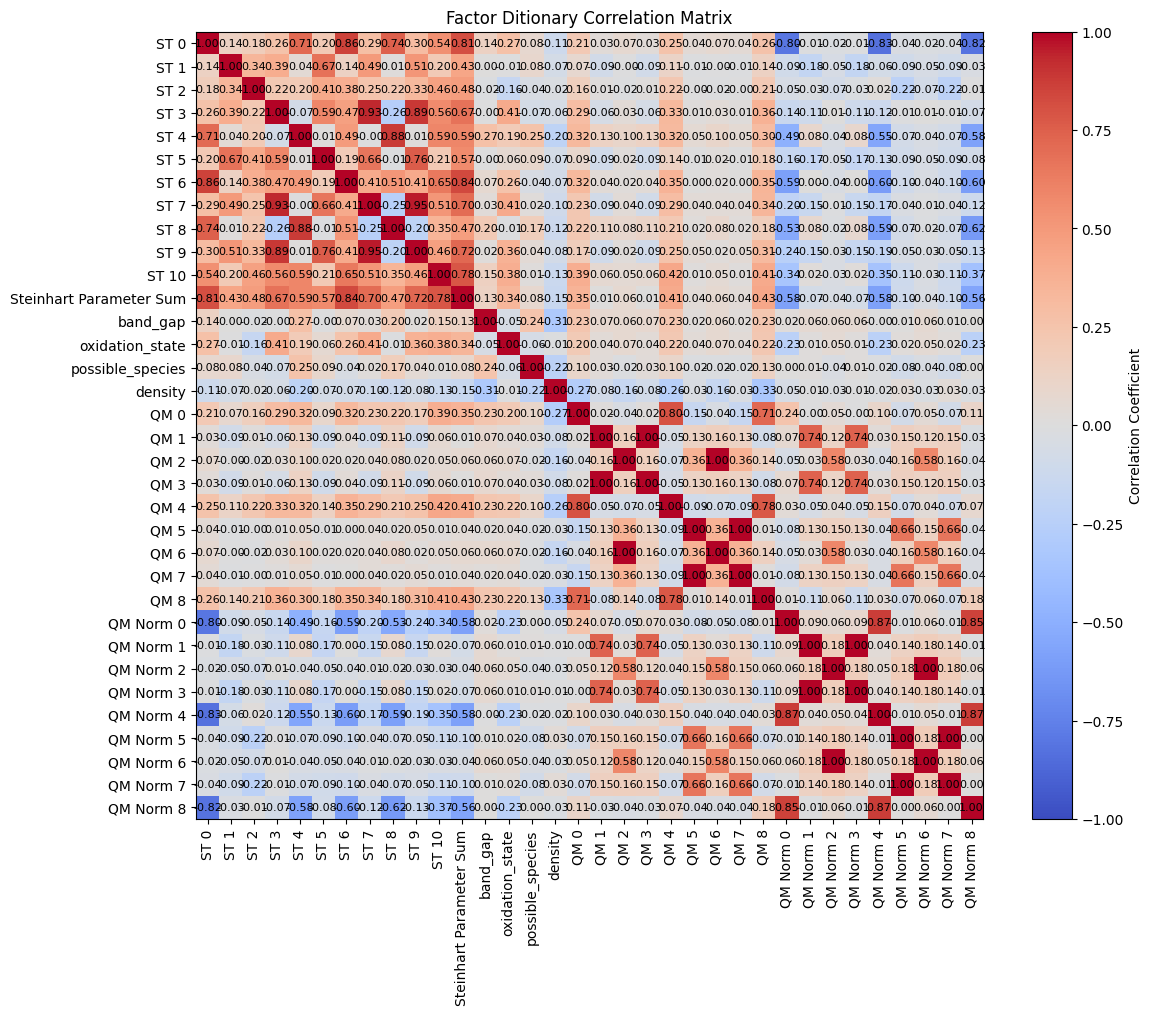

In [8]:
# Plot the correlation matrix using a diverging color map
plt.figure(figsize=(12, 10))
plt.imshow(factor_df_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')

# Add labels
plt.xticks(range(len(factor_df_corr.columns)), factor_df_corr.columns, rotation=90)
plt.yticks(range(len(factor_df_corr.columns)), factor_df_corr.columns)
plt.title('Factor Ditionary Correlation Matrix')

# Display values in the cells
for i in range(len(factor_df_corr.columns)):
    for j in range(len(factor_df_corr.columns)):
        plt.text(j, i, f"{factor_df_corr.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

Recall that the QM was changed such that the normalization is proporional to distance to the 4th power.